In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('survey_data_updated 5.csv')

In [5]:
print(np.array(df.columns))

['ResponseId' 'MainBranch' 'Age' 'Employment' 'RemoteWork' 'Check'
 'CodingActivities' 'EdLevel' 'LearnCode' 'LearnCodeOnline' 'TechDoc'
 'YearsCode' 'YearsCodePro' 'DevType' 'OrgSize' 'PurchaseInfluence'
 'BuyNewTool' 'BuildvsBuy' 'TechEndorse' 'Country' 'Currency' 'CompTotal'
 'LanguageHaveWorkedWith' 'LanguageWantToWorkWith' 'LanguageAdmired'
 'DatabaseHaveWorkedWith' 'DatabaseWantToWorkWith' 'DatabaseAdmired'
 'PlatformHaveWorkedWith' 'PlatformWantToWorkWith' 'PlatformAdmired'
 'WebframeHaveWorkedWith' 'WebframeWantToWorkWith' 'WebframeAdmired'
 'EmbeddedHaveWorkedWith' 'EmbeddedWantToWorkWith' 'EmbeddedAdmired'
 'MiscTechHaveWorkedWith' 'MiscTechWantToWorkWith' 'MiscTechAdmired'
 'ToolsTechHaveWorkedWith' 'ToolsTechWantToWorkWith' 'ToolsTechAdmired'
 'NEWCollabToolsHaveWorkedWith' 'NEWCollabToolsWantToWorkWith'
 'NEWCollabToolsAdmired' 'OpSysPersonal use' 'OpSysProfessional use'
 'OfficeStackAsyncHaveWorkedWith' 'OfficeStackAsyncWantToWorkWith'
 'OfficeStackAsyncAdmired' 'OfficeSt

In [7]:
df=df[["ResponseId",'LanguageHaveWorkedWith']]

In [9]:
df

,ResponseId,LanguageHaveWorkedWith
0,2,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
1,3,C#
2,10,HTML/CSS;JavaScript;TypeScript
3,11,JavaScript;Python;Ruby
4,12,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Power...
...,...,...
18840,65307,Go;HTML/CSS;JavaScript;Python;TypeScript
18841,65327,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
18842,65352,Bash/Shell (all shells);C;C++;HTML/CSS;Java;Ja...
18843,65402,C#;HTML/CSS;JavaScript;SQL;TypeScript


In [11]:
# Split 'LanguageHaveWorkedWith' by semicolon and create new rows for each language
unpivoted_df = df.set_index('ResponseId')['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(name='Language')

# Rename columns for clarity
unpivoted_df.columns = ['ResponseId', 'LanguageIndex', 'Language']

# Drop the 'LanguageIndex' column
unpivoted_df = unpivoted_df.drop(columns=['LanguageIndex'])

# Resulting unpivoted dataframe
print(unpivoted_df)

        ResponseId                 Language
0                2  Bash/Shell (all shells)
1                2                       Go
2                2                 HTML/CSS
3                2                     Java
4                2               JavaScript
...            ...                      ...
116552       65432               PowerShell
116553       65432                   Python
116554       65432                      SQL
116555       65432                    Swift
116556       65432               TypeScript

[116557 rows x 2 columns]


In [13]:

# Count the number of responses per language
language_count = unpivoted_df.groupby('Language')['ResponseId'].nunique().reset_index()

# Sort the data to find the most common languages
language_count_sorted = language_count.sort_values(by='ResponseId', ascending=False)

# Display the top languages
print(language_count_sorted)

                   Language  ResponseId
22               JavaScript       14943
40                      SQL       12602
19                 HTML/CSS       12410
44               TypeScript       10709
36                   Python        9590
3   Bash/Shell (all shells)        7244
5                        C#        6340
21                     Java        5982
32                      PHP        4644
34               PowerShell        3438
17                       Go        3305
6                       C++        3081
4                         C        2777
39                     Rust        2284
24                   Kotlin        1958
38                     Ruby        1500
10                     Dart        1390
26                      Lua        1160
46      Visual Basic (.Net)         957
43                    Swift         898
18                   Groovy         756
37                        R         711
45                      VBA         710
2                  Assembly         685


In [15]:
language_count_sorted.to_csv("LanguageHaveWorkedWith1.csv")

In [41]:
top10_lang=pd.DataFrame(language_count_sorted.head(10))
top10_lang

,Language,ResponseId
22,JavaScript,14943
40,SQL,12602
19,HTML/CSS,12410
44,TypeScript,10709
36,Python,9590
3,Bash/Shell (all shells),7244
5,C#,6340
21,Java,5982
32,PHP,4644
34,PowerShell,3438


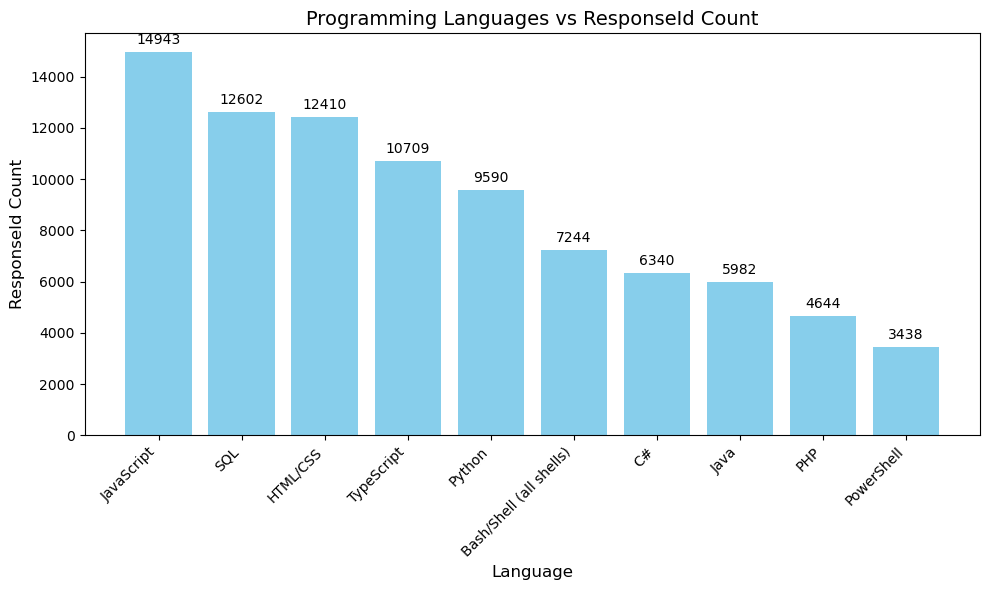

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_lang['Language'], top10_lang['ResponseId'], color='skyblue')

# Add title and labels
plt.title('Programming Languages vs ResponseId Count', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('ResponseId Count', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add annotations above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 200, str(height), 
             ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
df = pd.read_csv('survey_data_updated 5.csv')

# Split 'LanguageWantToWorkWith' by semicolon and create new rows for each language
unpivoted_df_want_to_work = df.set_index('ResponseId')['LanguageWantToWorkWith'].str.split(';', expand=True).stack().reset_index(name='Language')

# Rename columns for clarity
unpivoted_df_want_to_work.columns = ['ResponseId', 'LanguageIndex', 'Language']

# Drop the 'LanguageIndex' column
unpivoted_df_want_to_work = unpivoted_df_want_to_work.drop(columns=['LanguageIndex'])

# Resulting unpivoted dataframe
print(unpivoted_df_want_to_work)

        ResponseId                 Language
0                2  Bash/Shell (all shells)
1                2                       Go
2                2                 HTML/CSS
3                2                     Java
4                2               JavaScript
...            ...                      ...
106351       65432                   Python
106352       65432                     Rust
106353       65432                      SQL
106354       65432                    Swift
106355       65432               TypeScript

[106356 rows x 2 columns]


In [33]:
unpivoted_df_want_to_work.to_csv('LanguageWantToWorkWith.csv')

In [35]:
df = pd.read_csv('survey_data_updated 5.csv')
# Split 'DatabaseHaveWorkedWith' by semicolon and create new rows for each database
unpivoted_df_db_have_worked = df.set_index('ResponseId')['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(name='Database')

# Rename columns for clarity
unpivoted_df_db_have_worked.columns = ['ResponseId', 'DatabaseIndex', 'Database']

# Drop the 'DatabaseIndex' column
unpivoted_df_db_have_worked = unpivoted_df_db_have_worked.drop(columns=['DatabaseIndex'])

# Resulting unpivoted dataframe
print(unpivoted_df_db_have_worked)

       ResponseId                    Database
0               2                    Dynamodb
1               2                     MongoDB
2               2                  PostgreSQL
3               3  Firebase Realtime Database
4              10                     MongoDB
...           ...                         ...
69581       65432        Microsoft SQL Server
69582       65432                       MySQL
69583       65432                      Oracle
69584       65432                  PostgreSQL
69585       65432                      SQLite

[69586 rows x 2 columns]


In [37]:
unpivoted_df_db_have_worked.to_csv('DatabaseHaveWorkedWith.csv')

In [39]:
df = pd.read_csv('survey_data_updated 5.csv')
# Split 'DatabaseWantToWorkWith' by semicolon and create new rows for each database
unpivoted_df_db_want_to_work = df.set_index('ResponseId')['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().reset_index(name='Database')

# Rename columns for clarity
unpivoted_df_db_want_to_work.columns = ['ResponseId', 'DatabaseIndex', 'Database']

# Drop the 'DatabaseIndex' column
unpivoted_df_db_want_to_work = unpivoted_df_db_want_to_work.drop(columns=['DatabaseIndex'])

# Resulting unpivoted dataframe
print(unpivoted_df_db_want_to_work)


       ResponseId                    Database
0               2                  PostgreSQL
1               3  Firebase Realtime Database
2              10                     MongoDB
3              10                       MySQL
4              10                  PostgreSQL
...           ...                         ...
65908       65402                    Couch DB
65909       65402               Elasticsearch
65910       65432               Elasticsearch
65911       65432                  PostgreSQL
65912       65432                       Redis

[65913 rows x 2 columns]


In [41]:
unpivoted_df_db_want_to_work.to_csv('DatabaseWantToWorkWith.csv')


In [43]:
unpivoted_df_platform_have_worked = df.set_index('ResponseId')['PlatformHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(name='Platform')

# Rename columns for clarity
unpivoted_df_platform_have_worked.columns = ['ResponseId', 'PlatformIndex', 'Platform']

# Drop the 'PlatformIndex' column
unpivoted_df_platform_have_worked = unpivoted_df_platform_have_worked.drop(columns=['PlatformIndex'])

# Resulting unpivoted dataframe
print(unpivoted_df_platform_have_worked)

       ResponseId                   Platform
0               2  Amazon Web Services (AWS)
1               2                     Heroku
2               2                    Netlify
3               3               Google Cloud
4              10  Amazon Web Services (AWS)
...           ...                        ...
50650       65327  Amazon Web Services (AWS)
50651       65327                  OpenStack
50652       65352                        OVH
50653       65402            Microsoft Azure
50654       65432            Microsoft Azure

[50655 rows x 2 columns]


In [45]:
unpivoted_df_platform_have_worked.to_csv("PlatformHaveWorkedWith.csv")

In [47]:
# Split 'PlatformWantToWorkWith' by semicolon and create new rows for each platform
unpivoted_df_platform_want_to_work = df.set_index('ResponseId')['PlatformWantToWorkWith'].str.split(';', expand=True).stack().reset_index(name='Platform')

# Rename columns for clarity
unpivoted_df_platform_want_to_work.columns = ['ResponseId', 'PlatformIndex', 'Platform']

# Drop the 'PlatformIndex' column
unpivoted_df_platform_want_to_work = unpivoted_df_platform_want_to_work.drop(columns=['PlatformIndex'])

# Resulting unpivoted dataframe
print(unpivoted_df_platform_want_to_work)

       ResponseId                   Platform
0               2  Amazon Web Services (AWS)
1               2                     Heroku
2               2                    Netlify
3               3               Google Cloud
4              10  Amazon Web Services (AWS)
...           ...                        ...
48405       65352                     Vercel
48406       65402            Microsoft Azure
48407       65432  Amazon Web Services (AWS)
48408       65432                   Firebase
48409       65432            Microsoft Azure

[48410 rows x 2 columns]


In [49]:
unpivoted_df_platform_want_to_work.to_csv("PlatformWantToWorkWith.csv")

In [56]:
# Split 'WebFrameHaveWorkedWith' by semicolon and create new rows for each framework
unpivoted_df_web_frame_have_worked = df.set_index('ResponseId')['WebframeHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(name='WebFrame')

# Rename columns for clarity
unpivoted_df_web_frame_have_worked.columns = ['ResponseId', 'WebFrameIndex', 'WebFrame']

# Drop the 'WebFrameIndex' column
unpivoted_df_web_frame_have_worked = unpivoted_df_web_frame_have_worked.drop(columns=['WebFrameIndex'])

# Resulting unpivoted dataframe
print(unpivoted_df_web_frame_have_worked)

       ResponseId      WebFrame
0               2       Express
1               2       Next.js
2               2       Node.js
3               2         React
4               3  ASP.NET CORE
...           ...           ...
77798       65432        jQuery
77799       65432       Next.js
77800       65432       Node.js
77801       65432         React
77802       65432   Spring Boot

[77803 rows x 2 columns]


In [58]:
unpivoted_df_web_frame_have_worked.to_csv('WebframeHaveWorkedWith.csv')

In [62]:
unpivoted_df_web_frame_want_to_work = df.set_index('ResponseId')['WebframeWantToWorkWith'].str.split(';', expand=True).stack().reset_index(name='WebFrame')

# Rename columns for clarity
unpivoted_df_web_frame_want_to_work.columns = ['ResponseId', 'WebFrameIndex', 'WebFrame']

# Drop the 'WebFrameIndex' column
unpivoted_df_web_frame_want_to_work = unpivoted_df_web_frame_want_to_work.drop(columns=['WebFrameIndex'])

# Resulting unpivoted dataframe
print(unpivoted_df_web_frame_want_to_work)

       ResponseId      WebFrame
0               2       Express
1               2          Htmx
2               2       Node.js
3               2         React
4               2         Remix
...           ...           ...
71412       65432       Angular
71413       65432       ASP.NET
71414       65432  ASP.NET CORE
71415       65432       Node.js
71416       65432   Spring Boot

[71417 rows x 2 columns]


In [64]:
unpivoted_df_web_frame_want_to_work.to_csv("WebframeWantToWorkWith.csv")

In [68]:
# Count the number of responses per language
language_count = unpivoted_df_want_to_work.groupby('Language')['ResponseId'].nunique().reset_index()

# Sort the data to find the most common languages
language_count_sorted = language_count.sort_values(by='ResponseId', ascending=False)

# Display the top languages
print(language_count_sorted.head(10))

                   Language  ResponseId
22               JavaScript       11541
40                      SQL       10944
44               TypeScript       10437
19                 HTML/CSS       10016
36                   Python        8919
17                       Go        5661
39                     Rust        5597
5                        C#        5590
3   Bash/Shell (all shells)        5582
21                     Java        4048


In [72]:
# Count the number of responses per language
language_count = unpivoted_df_db_have_worked.groupby('Database')['ResponseId'].nunique().reset_index()

# Sort the data to find the most common languages
language_count_sorted = language_count.sort_values(by='ResponseId', ascending=False)

# Display the top languages
print(language_count_sorted.head(10))

                Database  ResponseId
26            PostgreSQL       11514
23                 MySQL        8556
30                SQLite        7021
22               MongoDB        5930
21  Microsoft SQL Server        5870
29                 Redis        5814
19               MariaDB        3994
12         Elasticsearch        3491
11              Dynamodb        2268
25                Oracle        1907


In [74]:


# Count the number of responses per language
language_count = unpivoted_df_db_want_to_work.groupby('Database')['ResponseId'].nunique().reset_index()

# Sort the data to find the most common languages
language_count_sorted = language_count.sort_values(by='ResponseId', ascending=False)

# Display the top languages
print(language_count_sorted.head(10))

                Database  ResponseId
26            PostgreSQL       12193
29                 Redis        6384
30                SQLite        6295
23                 MySQL        6204
22               MongoDB        5618
21  Microsoft SQL Server        4345
12         Elasticsearch        3665
19               MariaDB        3078
11              Dynamodb        2154
33              Supabase        1623


In [80]:
numbers = [1, 2, 3, 4, 5]
squared_numbers = map(lambda x: x**2, numbers)

# Converting map object to list
print(list(squared_numbers)) 

[1, 4, 9, 16, 25]
